In [297]:
from citipy import citipy
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

In [298]:
# Longitude is in the range -180 and +180 
#  latitude of 90°
countries = []
cities = []

#populate city list
for x in range(-180, 180):
    for y in range(-90, 90):
        city = citipy.nearest_city(x, y)
        country = city.country_code
        city_name = city.city_name
        cities.append(city_name)
        countries.append(country)

KeyboardInterrupt: 

In [ ]:
#join lists into dataframe and remove duplicates
cities_df = pd.DataFrame(cities, columns=['City'])
cities_df = cities_df.reset_index()

countries_df = pd.DataFrame(countries, columns=['Country'])
countries_df = countries_df.reset_index()

#merge
city_df = pd.concat([cities_df, countries_df], axis=1)

#clean city_df
city_df1 = city_df
city_df1 = city_df1.drop(city_df.columns[[0, 2]], axis=1)
city_df1 = city_df1.drop_duplicates()
city_df1 = city_df1.reset_index()
city_df2 = city_df1.drop(city_df1.columns[0], axis=1)

In [ ]:
#sample
city_sample = city_df2.sample(564)

In [286]:
#call variables
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
data = {}
weather_df = pd.DataFrame()
city_number = 1
units = "imperial"

#loop through cities
for index, row in city_sample.iterrows():
    query_url = url + "appid=" + api_key + "&q=" + row['City'] + ',' + row['Country'] + "&units=" + units
    print('City ' + str(city_number) + ':' + row['City'] + '    is being processed: ' + query_url )
    weather_response = requests.get(query_url)
    try:
        weather_json = weather_response.json()
    except KeyError:
        print(row['City'] + ' was not found in weather API')
    try:
        data = {'Temperature (F)': weather_json['main']['temp'], 
                 'Humidity (%)': weather_json['main']['humidity'], 
                 'Cloudiness (%)' : weather_json['clouds']['all'], 
                'Wind Speed (mph)': weather_json['wind']['speed'],
                'City' : row['City'],
                'Country' : row['Country'],
                'Latitude' : weather_json['coord']["lat"]
                
           }
    except KeyError:
        print(row['City'] + ' was not found in weather API. Moving to next record.')
    data_df = pd.DataFrame(data, index=[0])
    data_df = data_df.set_index(data_df['City'])
    weather_df = pd.concat([weather_df, data_df], axis=0)
    city_number = city_number +1
weather_data = weather_df
weather_df = weather_df.drop_duplicates()

City 1:dzheguta    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dzheguta,ru&units=imperial
City 2:lujan    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lujan,ar&units=imperial
City 3:kirkwood    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kirkwood,za&units=imperial
City 4:durham    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=durham,us&units=imperial
City 5:marrakesh    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=marrakesh,ma&units=imperial
City 6:tzaneen    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tzaneen,za&units=imperial
City 7:pontes e lacerda    is being processed: http://api.openweathermap.org/data/2.5/

City 53:yokadouma    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yokadouma,cm&units=imperial
City 54:campo maior    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=campo maior,br&units=imperial
City 55:black river    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=black river,jm&units=imperial
City 56:ntungamo    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ntungamo,ug&units=imperial
City 57:tubuala    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tubuala,pa&units=imperial
City 58:mudbidri    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mudbidri,in&units=imperial
City 59:westerland    is being processed: http://api.openw

City 105:marevo    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=marevo,ru&units=imperial
City 106:san luis    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san luis,ar&units=imperial
City 107:kaupanger    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kaupanger,no&units=imperial
City 108:galashki    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=galashki,ru&units=imperial
City 109:humaita    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=humaita,br&units=imperial
humaita was not found in weather API. Moving to next record.
City 110:adre    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=adre,td&units=imperial
City 111:puksoo

City 155:nimaparha    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nimaparha,in&units=imperial
City 156:luanda    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=luanda,ao&units=imperial
City 157:yakshur-bodya    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yakshur-bodya,ru&units=imperial
yakshur-bodya was not found in weather API. Moving to next record.
City 158:vagamo    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vagamo,no&units=imperial
City 159:arraial do cabo    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=arraial do cabo,br&units=imperial
City 160:burica    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=burica,p

City 203:maltahohe    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maltahohe,na&units=imperial
City 204:vieira de leiria    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vieira de leiria,pt&units=imperial
City 205:copacabana    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=copacabana,bo&units=imperial
City 206:san juan del sur    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san juan del sur,ni&units=imperial
City 207:arkhangelsk    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=arkhangelsk,ru&units=imperial
City 208:kamyshin    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kamyshin,ru&units=imperial
City 209:skagastrond

City 254:uryupinsk    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=uryupinsk,ru&units=imperial
City 255:itaunja    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=itaunja,in&units=imperial
City 256:peru    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=peru,us&units=imperial
City 257:upala    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=upala,cr&units=imperial
City 258:shchuchye    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shchuchye,ru&units=imperial
shchuchye was not found in weather API. Moving to next record.
City 259:helsinki    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=helsinki,fi&units=imperial
City 260:uyem

City 305:sabzevar    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sabzevar,ir&units=imperial
City 306:calvia    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=calvia,es&units=imperial
City 307:malyye derbety    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=malyye derbety,ru&units=imperial
City 308:bekhtery    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bekhtery,ua&units=imperial
City 309:venice    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=venice,us&units=imperial
City 310:killini    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=killini,gr&units=imperial
killini was not found in weather API. Moving to next record.
C

City 356:calvinia    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=calvinia,za&units=imperial
City 357:punalur    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punalur,in&units=imperial
City 358:machali    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=machali,cl&units=imperial
City 359:kuusamo    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kuusamo,fi&units=imperial
City 360:dharur    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dharur,in&units=imperial
City 361:salamanca    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=salamanca,es&units=imperial
City 362:pucallpa    is being processed: http://api.openweathermap.org/d

City 407:zanesville    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=zanesville,us&units=imperial
City 408:beloha    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=beloha,mg&units=imperial
City 409:el cobre    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=el cobre,cu&units=imperial
City 410:potgietersrus    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=potgietersrus,za&units=imperial
potgietersrus was not found in weather API. Moving to next record.
City 411:kranea elassonos    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kranea elassonos,gr&units=imperial
City 412:nibbar    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=

City 457:akhmeta    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=akhmeta,ge&units=imperial
City 458:kouroussa    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kouroussa,gn&units=imperial
City 459:staryy krym    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=staryy krym,ua&units=imperial
City 460:upata    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=upata,ve&units=imperial
City 461:kilimatinde    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kilimatinde,tz&units=imperial
City 462:orsha    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=orsha,by&units=imperial
City 463:tumaco    is being processed: http://api.openweathermap

City 508:uppsala    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=uppsala,se&units=imperial
City 509:kissidougou    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kissidougou,gn&units=imperial
City 510:barcelos    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barcelos,br&units=imperial
City 511:darab    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=darab,ir&units=imperial
City 512:verkhnya syrovatka    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=verkhnya syrovatka,ua&units=imperial
verkhnya syrovatka was not found in weather API. Moving to next record.
City 513:salalah    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sa

middle island was not found in weather API. Moving to next record.
City 558:epernay    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=epernay,fr&units=imperial
City 559:vesoul    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vesoul,fr&units=imperial
City 560:chishtian mandi    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chishtian mandi,pk&units=imperial
City 561:port perry    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port perry,ca&units=imperial
City 562:ihosy    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ihosy,mg&units=imperial
City 563:marathon    is being processed: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=marathon,ca&units=

In [304]:
plt.style.use('ggplot')
%matplotlib inline
weather_df.to_csv('weather_df.csv')

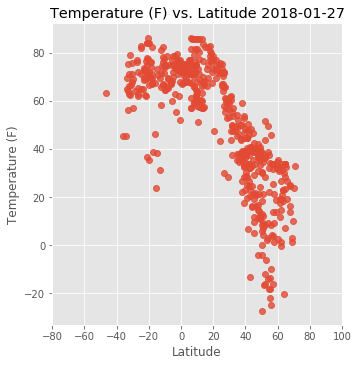

In [300]:
# Temperature (F) vs. Latitude
sns.lmplot(x='Latitude', y='Temperature (F)', data=weather_df,fit_reg=False)
plt.title('Temperature (F) vs. Latitude ' + date)
plt.xlim(-80,100)
plt.savefig('Temperature (F) vs. Latitude.png')

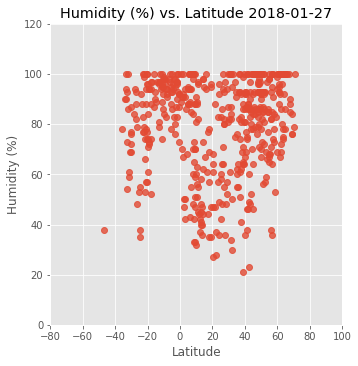

In [301]:
# Humidity (%) vs. Latitude
sns.lmplot(x='Latitude', y='Humidity (%)', data=weather_df,fit_reg=False)
plt.title('Humidity (%) vs. Latitude ' + date)
plt.ylim(0, 120)
plt.xlim(-80,100)
plt.savefig('Humidity (%) vs. Latitude.png')

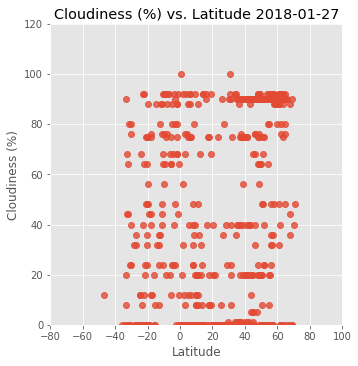

In [302]:
# Cloudiness (%) vs. Latitude
sns.lmplot(x='Latitude', y='Cloudiness (%)', data=weather_df, fit_reg=False)
plt.title('Cloudiness (%) vs. Latitude ' + date)
plt.ylim(0, 120)
plt.xlim(-80,100)
plt.savefig('Cloudiness (%) vs. Latitude.png')

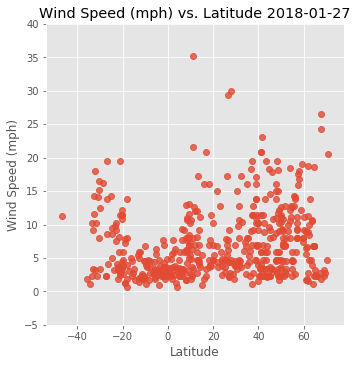

In [303]:
# Wind Speed (mph) vs. Latitude
sns.lmplot(x='Latitude', y='Wind Speed (mph)', data=weather_df, fit_reg=False)
plt.title('Wind Speed (mph) vs. Latitude ' + date)
plt.ylim(-5, 40)
plt.savefig('Wind Speed (mph) vs Latitude.png')